In [22]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import make_pipeline

from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier
from sklearn.metrics import confusion_matrix, precision_score, recall_score

In [23]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


1) 데이터 준비

In [24]:
!head -n 5 /content/drive/MyDrive/Colab Notebooks/ML2024_A/forest.csv

head: cannot open '/content/drive/MyDrive/Colab' for reading: No such file or directory
head: cannot open 'Notebooks/ML2024_A/forest.csv' for reading: No such file or directory


In [25]:
df = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/ML2024_A/forest.csv')

In [26]:
df

,elevation,aspect,slope,hdist2water,vdist2water,hdist2road,shade_9am,shade_noon,shade_3pm,hdist2fire,w1,w2,w3,s1,s2,cov_type
0,3160,347,13,127,15,4621,196,219,162,3139,1,0,0,0,0,1
1,3100,352,9,170,14,5367,205,225,158,1167,1,0,0,1,0,1
2,2675,31,11,212,20,3360,217,216,133,3072,0,0,1,0,1,1
3,3088,43,8,0,0,1611,222,222,136,674,0,0,1,1,0,1
4,3061,113,22,150,19,696,251,212,78,742,1,0,0,1,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6995,3288,96,32,127,42,2236,251,176,0,680,0,0,1,1,0,7
6996,3409,104,2,234,70,1718,222,236,150,1075,0,0,1,1,0,7
6997,3446,290,5,0,0,3141,206,239,172,2436,1,0,0,1,0,7
6998,3304,12,13,679,133,2574,207,214,143,2213,0,0,1,1,0,7


In [27]:
X = df.drop('cov_type', axis=1)
y = df['cov_type']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=1)

2) 로지스틱 회귀

In [29]:
pipe_logistic = make_pipeline(StandardScaler(), LogisticRegression(random_state=1, max_iter=300))
c_grid = {'logisticregression__C' : [0.01, 0.1, 1.0, 10, 100]}
logistic_cv = GridSearchCV(estimator=pipe_logistic,
                    param_grid = c_grid, cv = 10,
                    scoring='accuracy', refit = True, n_jobs=-1)
logistic_cv.fit(X_train, y_train)
print(logistic_cv.best_score_)
print(logistic_cv.best_params_)
print(logistic_cv.score(X_test, y_test))

0.6910714285714284
{'logisticregression__C': 10}
0.6678571428571428


3) k-NN 분류기

In [30]:
pipe_knn = make_pipeline(StandardScaler(), KNeighborsClassifier())
k_grid = {'kneighborsclassifier__n_neighbors' : list(range(1, 10, 2))}
knn_cv = GridSearchCV(estimator=pipe_knn,
                    param_grid = k_grid, cv = 10,
                    scoring='accuracy', refit = True, n_jobs=-1)
knn_cv.fit(X_train, y_train)
print(knn_cv.best_score_)
print(knn_cv.best_params_)
print(knn_cv.score(X_test, y_test))

0.7273214285714286
{'kneighborsclassifier__n_neighbors': 1}
0.7385714285714285


4) 결정트리 분류기

In [31]:
depth_grid = {'max_depth': range(1, 31)}
tree_cv = GridSearchCV(estimator=DecisionTreeClassifier(random_state=1),
                    param_grid = depth_grid, cv = 10,
                    scoring='accuracy', refit = True, n_jobs=-1)
tree_cv.fit(X_train, y_train)
print(tree_cv.best_score_)
print(tree_cv.best_params_)
print(tree_cv.score(X_test, y_test))

0.7212500000000001
{'max_depth': 15}
0.7321428571428571


5) 랜덤 포레스트 분류기

In [32]:
depth_grid = {'max_depth': range(1, 11)}
forest_cv = GridSearchCV(estimator=RandomForestClassifier(n_estimators=200, random_state=1),
                    param_grid = depth_grid, cv = 10,
                    scoring='accuracy', refit = True, n_jobs=-1)
forest_cv.fit(X_train, y_train)
print(forest_cv.best_score_)
print(forest_cv.best_params_)
print(forest_cv.score(X_test, y_test))

0.785
{'max_depth': 10}
0.7885714285714286


6) AdaBoost 분류기

In [33]:
learningrate_grid = {'learning_rate': np.linspace(0.1, 1.0, 10)}
# Adjusted parameters for faster execution
ada_cv_fast = GridSearchCV(
    estimator=AdaBoostClassifier(DecisionTreeClassifier(max_depth=3), n_estimators=50, random_state=1),
    param_grid = learningrate_grid, cv = 3, # Reduced cv to 3
    scoring='accuracy', refit = True)

ada_cv_fast.fit(X_train, y_train)

print("Adjusted AdaBoost Best CV Score:", ada_cv_fast.best_score_)
print("Adjusted AdaBoost Best Parameters:", ada_cv_fast.best_params_)
print("Adjusted AdaBoost Test Score:", ada_cv_fast.score(X_test, y_test))


Adjusted AdaBoost Best CV Score: 0.6830370016990918
Adjusted AdaBoost Best Parameters: {'learning_rate': np.float64(0.5)}
Adjusted AdaBoost Test Score: 0.6871428571428572


7) 모형별 성능 비교

In [10]:
import pandas as pd

# 사용자로부터 제공받은 데이터
data = {
    '모형': ['로지스틱회귀', 'KNN', '트리', '랜덤포레스트', '아다부스트'],
    '최적 초모수': ['C=10', 'k=1', 'max_depth=15', 'max_depth=10', 'learning_rate=0.7'],
    '테스트 스코어': [0.668, 0.738, 0.732, 0.788, 0.840]
}

# DataFrame 생성
model_performance_custom = pd.DataFrame(data)

# '테스트 스코어' 열을 소수점 셋째 자리까지 포맷팅
model_performance_custom['테스트 스코어'] = model_performance_custom['테스트 스코어'].apply(lambda x: f'{x:.3f}')

# 인덱스를 숨기고, 헤더는 가운데 정렬, 모든 데이터 열은 왼쪽 정렬하는 스타일 적용 후 HTML 테이블로 표시
display(model_performance_custom.style.hide(axis="index").set_table_styles([
    {'selector': 'th', 'props': [('text-align', 'center')]},
    {'selector': 'td:nth-child(1)', 'props': [('text-align', 'left')]},
    {'selector': 'td:nth-child(2)', 'props': [('text-align', 'left')]},
    {'selector': 'td:nth-child(3)', 'props': [('text-align', 'left')]} # 세 번째 데이터 열 (테스트 스코어)을 왼쪽 정렬
]))

모형,최적 초모수,테스트 스코어
로지스틱회귀,C=10,0.668
KNN,k=1,0.738
트리,max_depth=15,0.732
랜덤포레스트,max_depth=10,0.788
아다부스트,learning_rate=0.7,0.840


8) 베스트 모형 성능 평가 지표

In [35]:
best_model = AdaBoostClassifier(DecisionTreeClassifier(max_depth=9), n_estimators=200, learning_rate=0.7, algorithm='SAMME', random_state=1)
best_model.fit(X_train, y_train)
y_pred = best_model.predict(X_test)
print(confusion_matrix(y_test, y_pred))
print('정밀도 =', precision_score(y_test, y_pred, average='weighted'))
print('재현율 =', recall_score(y_test, y_pred, average='weighted'))

/usr/local/lib/python3.12/dist-packages/sklearn/ensemble/_weight_boosting.py:519: FutureWarning: The parameter 'algorithm' is deprecated in 1.6 and has no effect. It will be removed in version 1.8.
  warnings.warn(


[[113  32   0   0   8   0  18]
 [ 45 133   3   0  18   8   0]
 [  0   2 177  13   4  23   0]
 [  0   0   3 204   0   1   0]
 [  0   7   1   0 196   4   0]
 [  0   1  21  10   3 164   0]
 [  5   0   0   0   0   0 183]]
정밀도 = 0.8316066480414185
재현율 = 0.8357142857142857


방법1 : mlxtend의 heatmap 함수

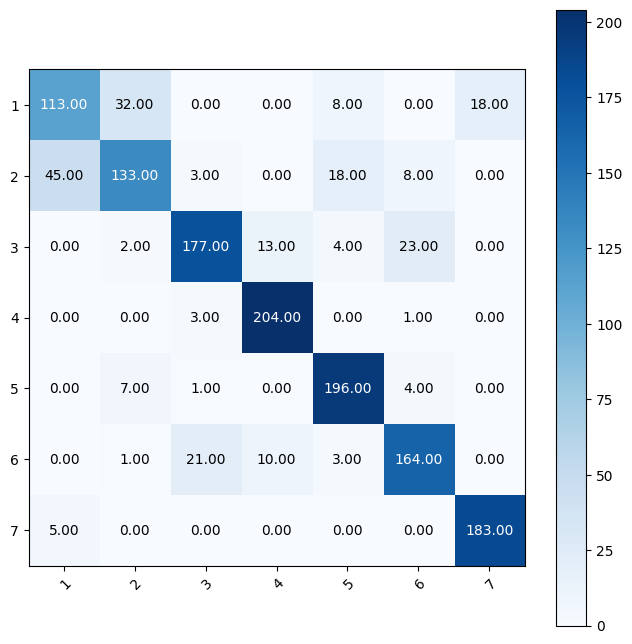

In [36]:
from mlxtend.plotting import heatmap
conf_mat = confusion_matrix(y_test, y_pred)
hmap = heatmap(conf_mat, figsize=(8,8), row_names=list(range(1, 8)), column_names=list(range(1, 8)),cmap='Blues')

방법2 : seaborn의 heapmap 함수

<Axes: >

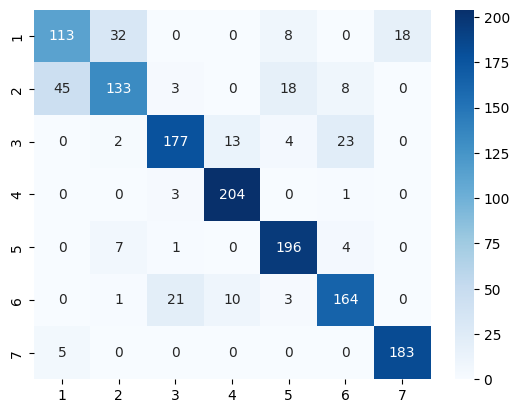

In [37]:
import seaborn as sns
sns.heatmap(conf_mat, annot=True, fmt='d', xticklabels=list(range(1, 8)), yticklabels=list(range(1, 8)),cmap='Blues')